In [10]:
print("                                  Observable trends based on the data")
print("")
print("")
print("1. Looking at the Bubble Chart there is a much higher density of rides in urban areas as opposed to rural areas.") 
print("   However, rural areas have much higher average cost per ride. This is likely due to the fact that rural areas have")
print("   much greater distances between the beginning and end points of a trip.")
print("")
print("2. While rural fares tend to be higher on average, urban drivers have an opportunity to make more money, based on the") 
print("   overall density of rides.")
print("")
print("3. It would be much easier to find a Pyber ride in an urban area versus the suburban or rurual areas.  Nearly 81% of") 
print("   Pyber drivers operate in urban areas.") 
print("")

                                  Observable trends based on the data


1. Looking at the Bubble Chart there is a much higher density of rides in urban areas as opposed to rural areas.
   However, rural areas have much higher average cost per ride. This is likely due to the fact that rural areas have
   much greater distances between the beginning and end points of a trip.

2. While rural fares tend to be higher on average, urban drivers have an opportunity to make more money, based on the
   overall density of rides.

3. It would be much easier to find a Pyber ride in an urban area versus the suburban or rurual areas.  Nearly 81% of
   Pyber drivers operate in urban areas.



In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load = os.path.join('data', 'city_data.csv')
ride_data_to_load = os.path.join('data', 'ride_data.csv')

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

#Drop Duplicates
city_df = city_df.drop_duplicates('city', keep = 'first')

# Combine the data into a single dataset
merged_data = pd.merge(city_df, ride_df, on='city', how='inner')
                       

# Display the data table for preview
 merged_data.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

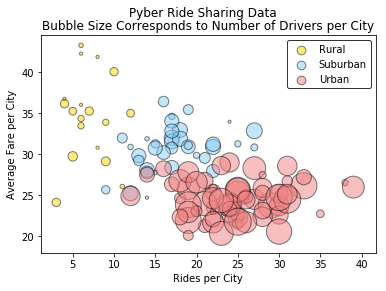

In [93]:
# Obtain the x and y coordinates for each of the three city types
by_city = merged_data.groupby('city')
avg_fare = by_city.mean()['fare']
ride_count = by_city['ride_id'].count()
driver_count = by_city.mean()['driver_count']
city_type = city_df.set_index('city')['type']


city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type})


city_info.sort_values('Number of Drivers', ascending = False)

rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 
              'Rural': color_scheme['Gold']}



# Build the scatter plots for each city types
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']
            *10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .5)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']
            *10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .5)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']
            *10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .5)


# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.suptitle("Pyber Ride Sharing Data")
plt.title("Bubble Size Corresponds to Number of Drivers per City")
plt.xlabel("Rides per City")
plt.ylabel("Average Fare per City")
# Save Figure
plt.show()

## Total Fares by City Type

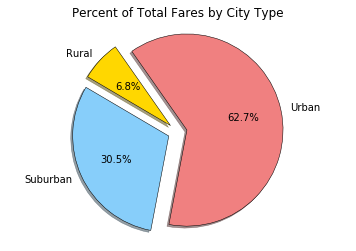

In [94]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure
#group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [.1 , .1, .1]
plt.pie(fare_sum, startangle = 125, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title("Percent of Total Fares by City Type")
plt.axis('equal')
plt.show()

## Total Rides by City Type

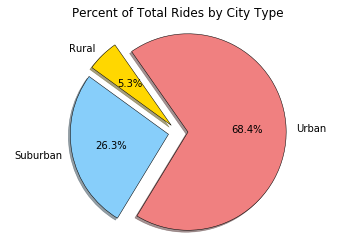

In [95]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("Percent of Total Rides by City Type")
plt.axis('equal')
plt.show()

## Total Drivers by City Type

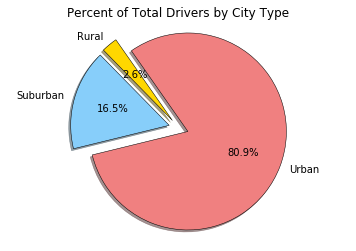

In [96]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
driver_sum = city_df.groupby('type').sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("Percent of Total Drivers by City Type")
plt.axis('equal')
plt.show()